In [1]:
import cv2
import glob
import numpy as np
from IPython.display import Image

# Task 2



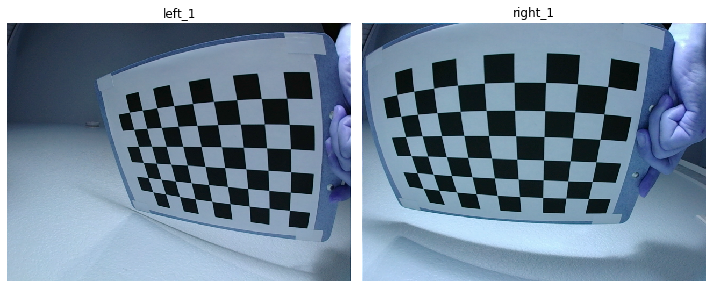

In [2]:
left_ = [cv2.imread(image) for image in glob.glob("../../images/task_1/left_*.png")]
right_ = [cv2.imread(image) for image in glob.glob("../../images/task_1/right_*.png")]

import matplotlib.pyplot as plt
def plot_figures(figures, nrows=1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,10))
    if(nrows > 1 or ncols > 1):
        for ind,title in enumerate(figures):
            axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
            axeslist.ravel()[ind].set_title(title)
            axeslist.ravel()[ind].set_axis_off()
        plt.tight_layout() # optional
    else:
        for ind,title in enumerate(figures):
            axeslist.imshow(figures[title], cmap=plt.gray())
            axeslist.set_title(title)
            axeslist.set_axis_off()
            

plot_figures({'left_1': left_[0], 'right_1': right_[0]}, 1, 2)

In [3]:
s = cv2.FileStorage('../task_1/calibrated_camera_parameters.xml', cv2.FileStorage_READ)

mtx = s.getNode('mtx').mat()
distCoeffs = s.getNode('distCoeffs').mat()
newcameramtx = s.getNode('newcameramtx').mat()
roi = s.getNode('roi').mat()
roi

array([[144.],
       [131.],
       [467.],
       [302.]])

# Step (2): Extract 3D-to-2D point correspondences :

This is the same as task 1 step (2). The only difference is that in this task there are two sets of 2D points for both cameras. The 3D points are the same as those in task 1 step (2).


True True True True True True True True True True True imgpoints_left:
 [array([[[525.6687 , 348.70154]],

       [[488.1539 , 345.1175 ]],

       [[451.018  , 340.98938]],

       [[415.22955, 336.6027 ]],

       [[381.43414, 332.17676]],

       [[350.2469 , 327.56476]],

       [[321.33777, 323.0721 ]],

       [[295.43008, 318.57022]],

       [[271.6198 , 314.48605]],

       [[527.4503 , 315.22592]],

       [[487.49927, 311.82455]],

       [[448.3776 , 308.344  ]],

       [[410.60852, 304.70654]],

       [[375.49203, 301.1396 ]],

       [[343.13998, 297.60507]],

       [[313.42075, 294.29422]],

       [[286.84393, 290.96368]],

       [[262.83762, 287.99567]],

       [[528.296  , 277.21252]],

       [[486.04977, 274.44086]],

       [[444.77362, 271.8177 ]],

       [[405.43668, 269.3595 ]],

       [[368.84836, 267.04443]],

       [[335.55927, 264.85843]],

       [[305.16428, 262.95615]],

       [[278.23175, 261.23846]],

       [[253.79741, 259.67047]],

       [[

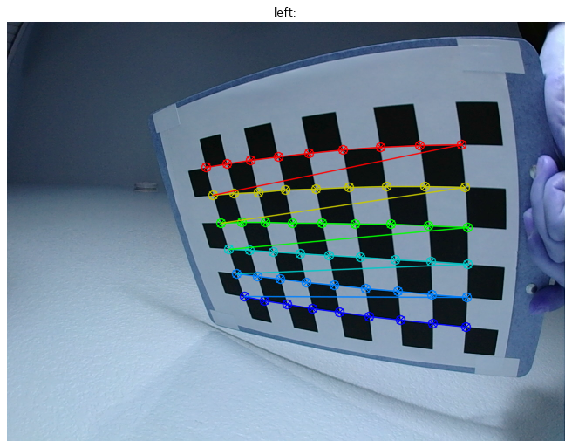

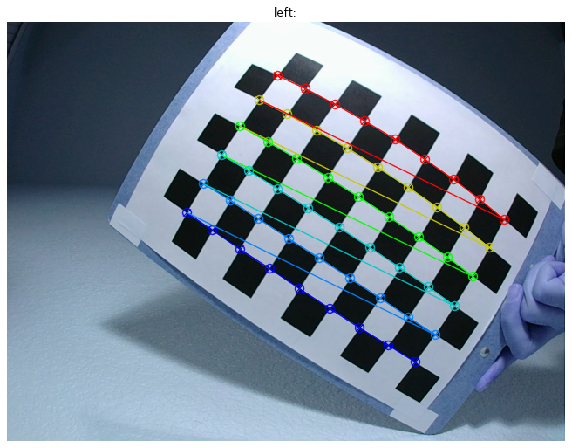

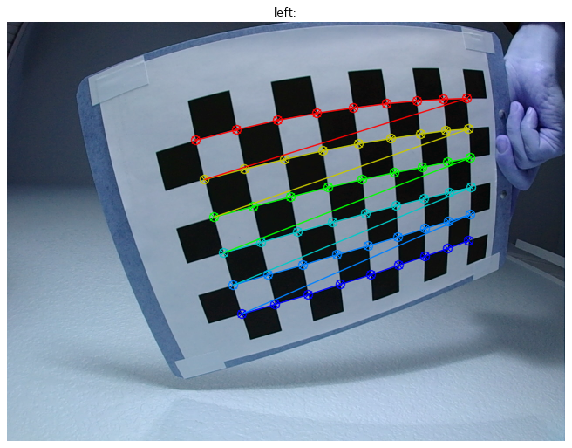

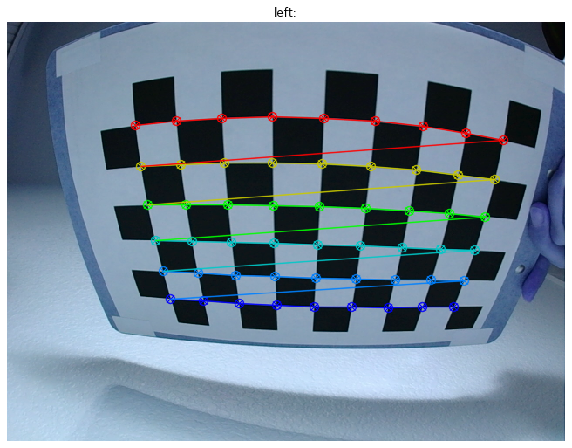

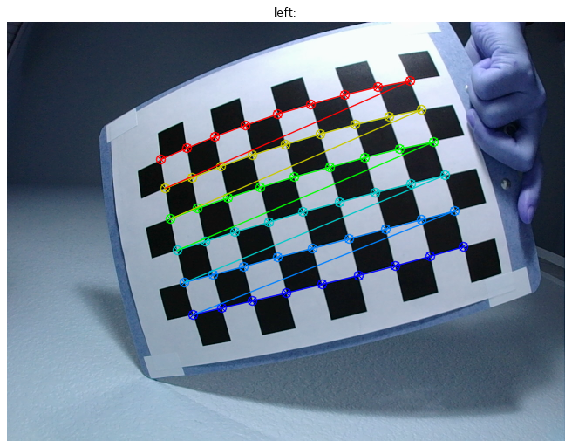

In [6]:
###this is for the left image##

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

rows = 6
columns = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(columns-1,rows-1,0)
objp = np.zeros((columns*rows,3), np.float32)
objp[:,:2] = np.mgrid[0:columns,0:rows].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.

for img_og in left_:
    img = img_og.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (columns,rows),None)
    print(ret,end=' ')
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints_left.append(corners2)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (columns,rows), corners2, ret)
        plot_figures({'left:':img},1)
        

print("\nimgpoints_left:\n",imgpoints_left)

In [8]:
###this is for the right image##

imgpoints_right = []

for img_og in right_:
    img = img_og.copy()

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners2 = cv2.findChessboardCorners(gray, (columns,rows),None)
    print(ret,end=' ')

    # If found, add object points, image points (after refining them)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners2,(11,11),(-1,-1),criteria)
        imgpoints_right.append(corners2)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (columns,rows), corners2,ret)
        plt.imshow(img)


print("\nimgpoints_right):\n",imgpoints_right)

True True True True True True True True True True True 
imgpoints_right):
 [array([[[421.6803  , 326.62918 ]],

       [[379.67923 , 326.06183 ]],

       [[336.57416 , 324.8248  ]],

       [[293.50845 , 323.13962 ]],

       [[251.89418 , 320.82346 ]],

       [[212.65999 , 318.1581  ]],

       [[176.25084 , 314.8725  ]],

       [[143.55176 , 311.4253  ]],

       [[114.11879 , 308.01288 ]],

       [[428.5266  , 295.29364 ]],

       [[383.49103 , 294.13193 ]],

       [[337.2453  , 292.5707  ]],

       [[291.05292 , 290.85263 ]],

       [[246.58247 , 288.75375 ]],

       [[205.137   , 286.51785 ]],

       [[166.75587 , 284.17584 ]],

       [[132.95058 , 281.56723 ]],

       [[102.84159 , 279.29718 ]],

       [[435.7514  , 258.66638 ]],

       [[387.6468  , 256.81268 ]],

       [[338.09207 , 255.14584 ]],

       [[288.57507 , 253.41113 ]],

       [[241.31163 , 251.85654 ]],

       [[197.45819 , 250.44264 ]],

       [[157.44286 , 249.18599 ]],

       [[122.45413 , 247

# Step (3): Calibrate the stereo camera :
Once the 3D-to-2D point correspondences are obtained, call OpenCV library function "stereoCalibrate()" to calculate the parameters between the two views, including the translation, rotation, the fundamental matrix, and the essential matrix. Note that the "CALIB_FIX_INTRINSIC" flag should be set and the camera intrinsics should be provided when you call the stereo calibration library function.

## calibrateCamera():

C++: double calibrateCamera(InputArrayOfArrays objectPoints, InputArrayOfArrays imagePoints, Size imageSize, InputOutputArray cameraMatrix, InputOutputArray distCoeffs, OutputArrayOfArrays rvecs, OutputArrayOfArrays tvecs, int flags=0, TermCriteria criteria=TermCriteria( TermCriteria::COUNT+TermCriteria::EPS, 30, DBL_EPSILON) )

Python: cv2.calibrateCamera(objectPoints, imagePoints, imageSize[, cameraMatrix[, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]]]) → retval, cameraMatrix, distCoeffs, rvecs, tvecs¶

## stereoCalibrate():

C++: double stereoCalibrate(InputArrayOfArrays objectPoints, InputArrayOfArrays imagePoints1, InputArrayOfArrays imagePoints2, InputOutputArray cameraMatrix1, InputOutputArray distCoeffs1, InputOutputArray cameraMatrix2, InputOutputArray distCoeffs2, Size imageSize, OutputArray R, OutputArray T, OutputArray E, OutputArray F, TermCriteria criteria=TermCriteria(TermCriteria::COUNT+TermCriteria::EPS, 30, 1e-6), int flags=CALIB_FIX_INTRINSIC )

Python: cv2.stereoCalibrate(objectPoints, imagePoints1, imagePoints2, imageSize[, cameraMatrix1[, distCoeffs1[, cameraMatrix2[, distCoeffs2[, R[, T[, E[, F[, criteria[, flags]]]]]]]]]]) → retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F

In [12]:
retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, (640, 480), None,None,None,None)

# Step (4): Check results by plotting in 3D
https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#triangulatepoints


Python: cv2.triangulatePoints(projMatr1, projMatr2, projPoints1, projPoints2[, points4D]) → points4D

Python: cv2.undistortPoints(src, cameraMatrix, distCoeffs[, dst[, R[, P]]]) → dst


In [ ]:
dst = cv2.undistortPoints(imgpoints_left[0], newcameramtx, distCoeffs, None, None, None)

In [9]:
points4D = cv2.triangulatePoints(cameraMatrix1, cameraMatrix2, , imgpoints_right[0], None)
points4D

(640, 480)

array([[525.6687 , 348.70154]], dtype=float32)